<a href="https://colab.research.google.com/github/daurickroy/Entri-Elevate---Project/blob/main/Online_Shoppers_Purchasing_Intention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [ ]:
data = pd.read_csv('online_shoppers_intention.csv')

data.head(5)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
data.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
data.describe()



,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
print(data.dtypes)




Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object


In [ ]:
print(data.shape)



(12330, 18)


In [ ]:
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
data = data.drop_duplicates()


Number of duplicate rows: 125


# Missing Values

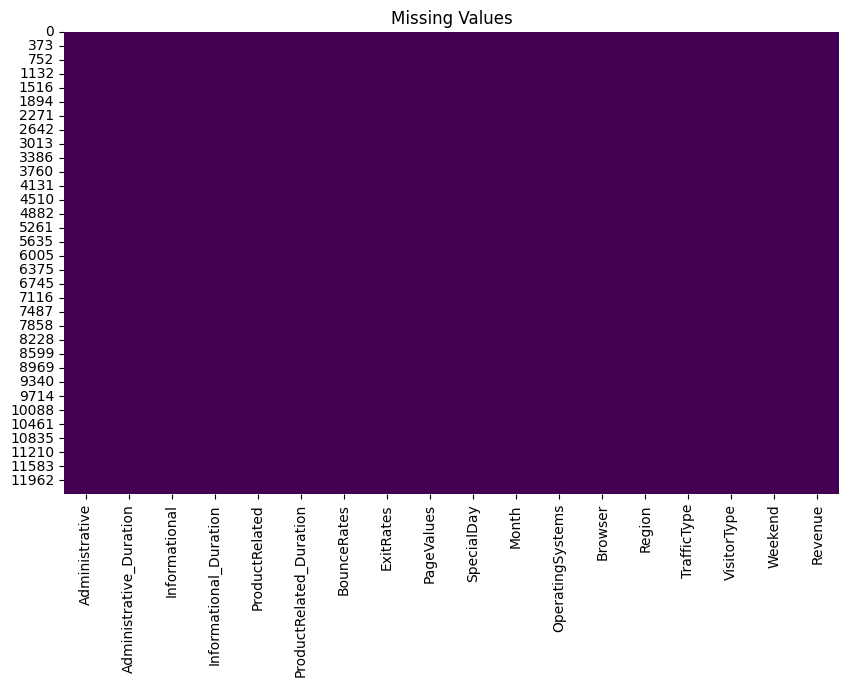

In [ ]:
data.isnull().sum()

# Visualize missing values
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values')
plt.show()


# **Encoding**

In [ ]:
print(data.select_dtypes(include='object').columns)

le = LabelEncoder()
data['VisitorType'] = le.fit_transform(data['VisitorType'])
data['Weekend'] = le.fit_transform(data['Weekend'])
data['Revenue'] = le.fit_transform(data['Revenue'])


data = pd.get_dummies(data, columns=['VisitorType'], drop_first=True)


Index(['Month', 'VisitorType'], dtype='object')


# Standardization (Scaling the data)


In [ ]:
num_cols = data.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

data.head()





,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisitorType_1,VisitorType_2
0,-0.702302,-0.460019,-0.398824,-0.246257,-0.696218,-0.628793,3.969402,3.434394,-0.318962,-0.31024,Feb,-1.239776,-0.794017,-0.896370,-0.765321,-0.553088,-0.430461,False,True
1,-0.702302,-0.460019,-0.398824,-0.246257,-0.673793,-0.595451,-0.450137,1.268054,-0.318962,-0.31024,Feb,-0.136980,-0.209237,-0.896370,-0.516347,-0.553088,-0.430461,False,True
2,-0.702302,-0.460019,-0.398824,-0.246257,-0.696218,-0.628793,3.969402,3.434394,-0.318962,-0.31024,Feb,2.068612,-0.794017,2.433853,-0.267374,-0.553088,-0.430461,False,True
3,-0.702302,-0.460019,-0.398824,-0.246257,-0.673793,-0.627404,0.654748,2.134590,-0.318962,-0.31024,Feb,0.965816,-0.209237,-0.480092,-0.018400,-0.553088,-0.430461,False,True
4,-0.702302,-0.460019,-0.398824,-0.246257,-0.494387,-0.301889,-0.008183,0.184884,-0.318962,-0.31024,Feb,0.965816,0.375543,-0.896370,-0.018400,1.808031,-0.430461,False,True


# **Outliers**

In [ ]:
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()

for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower) & (data[col] <= upper)]





# **Outlier Detection and Removal (IQR Method)**

In [ ]:
df = pd.read_csv('online_shoppers_intention.csv')

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

df_clean = df.copy()

for col in num_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

print("Shape after removing outliers:", df_clean.shape)



Shape after removing outliers: (2599, 18)


# **Box Plot for All Numeric Columns**

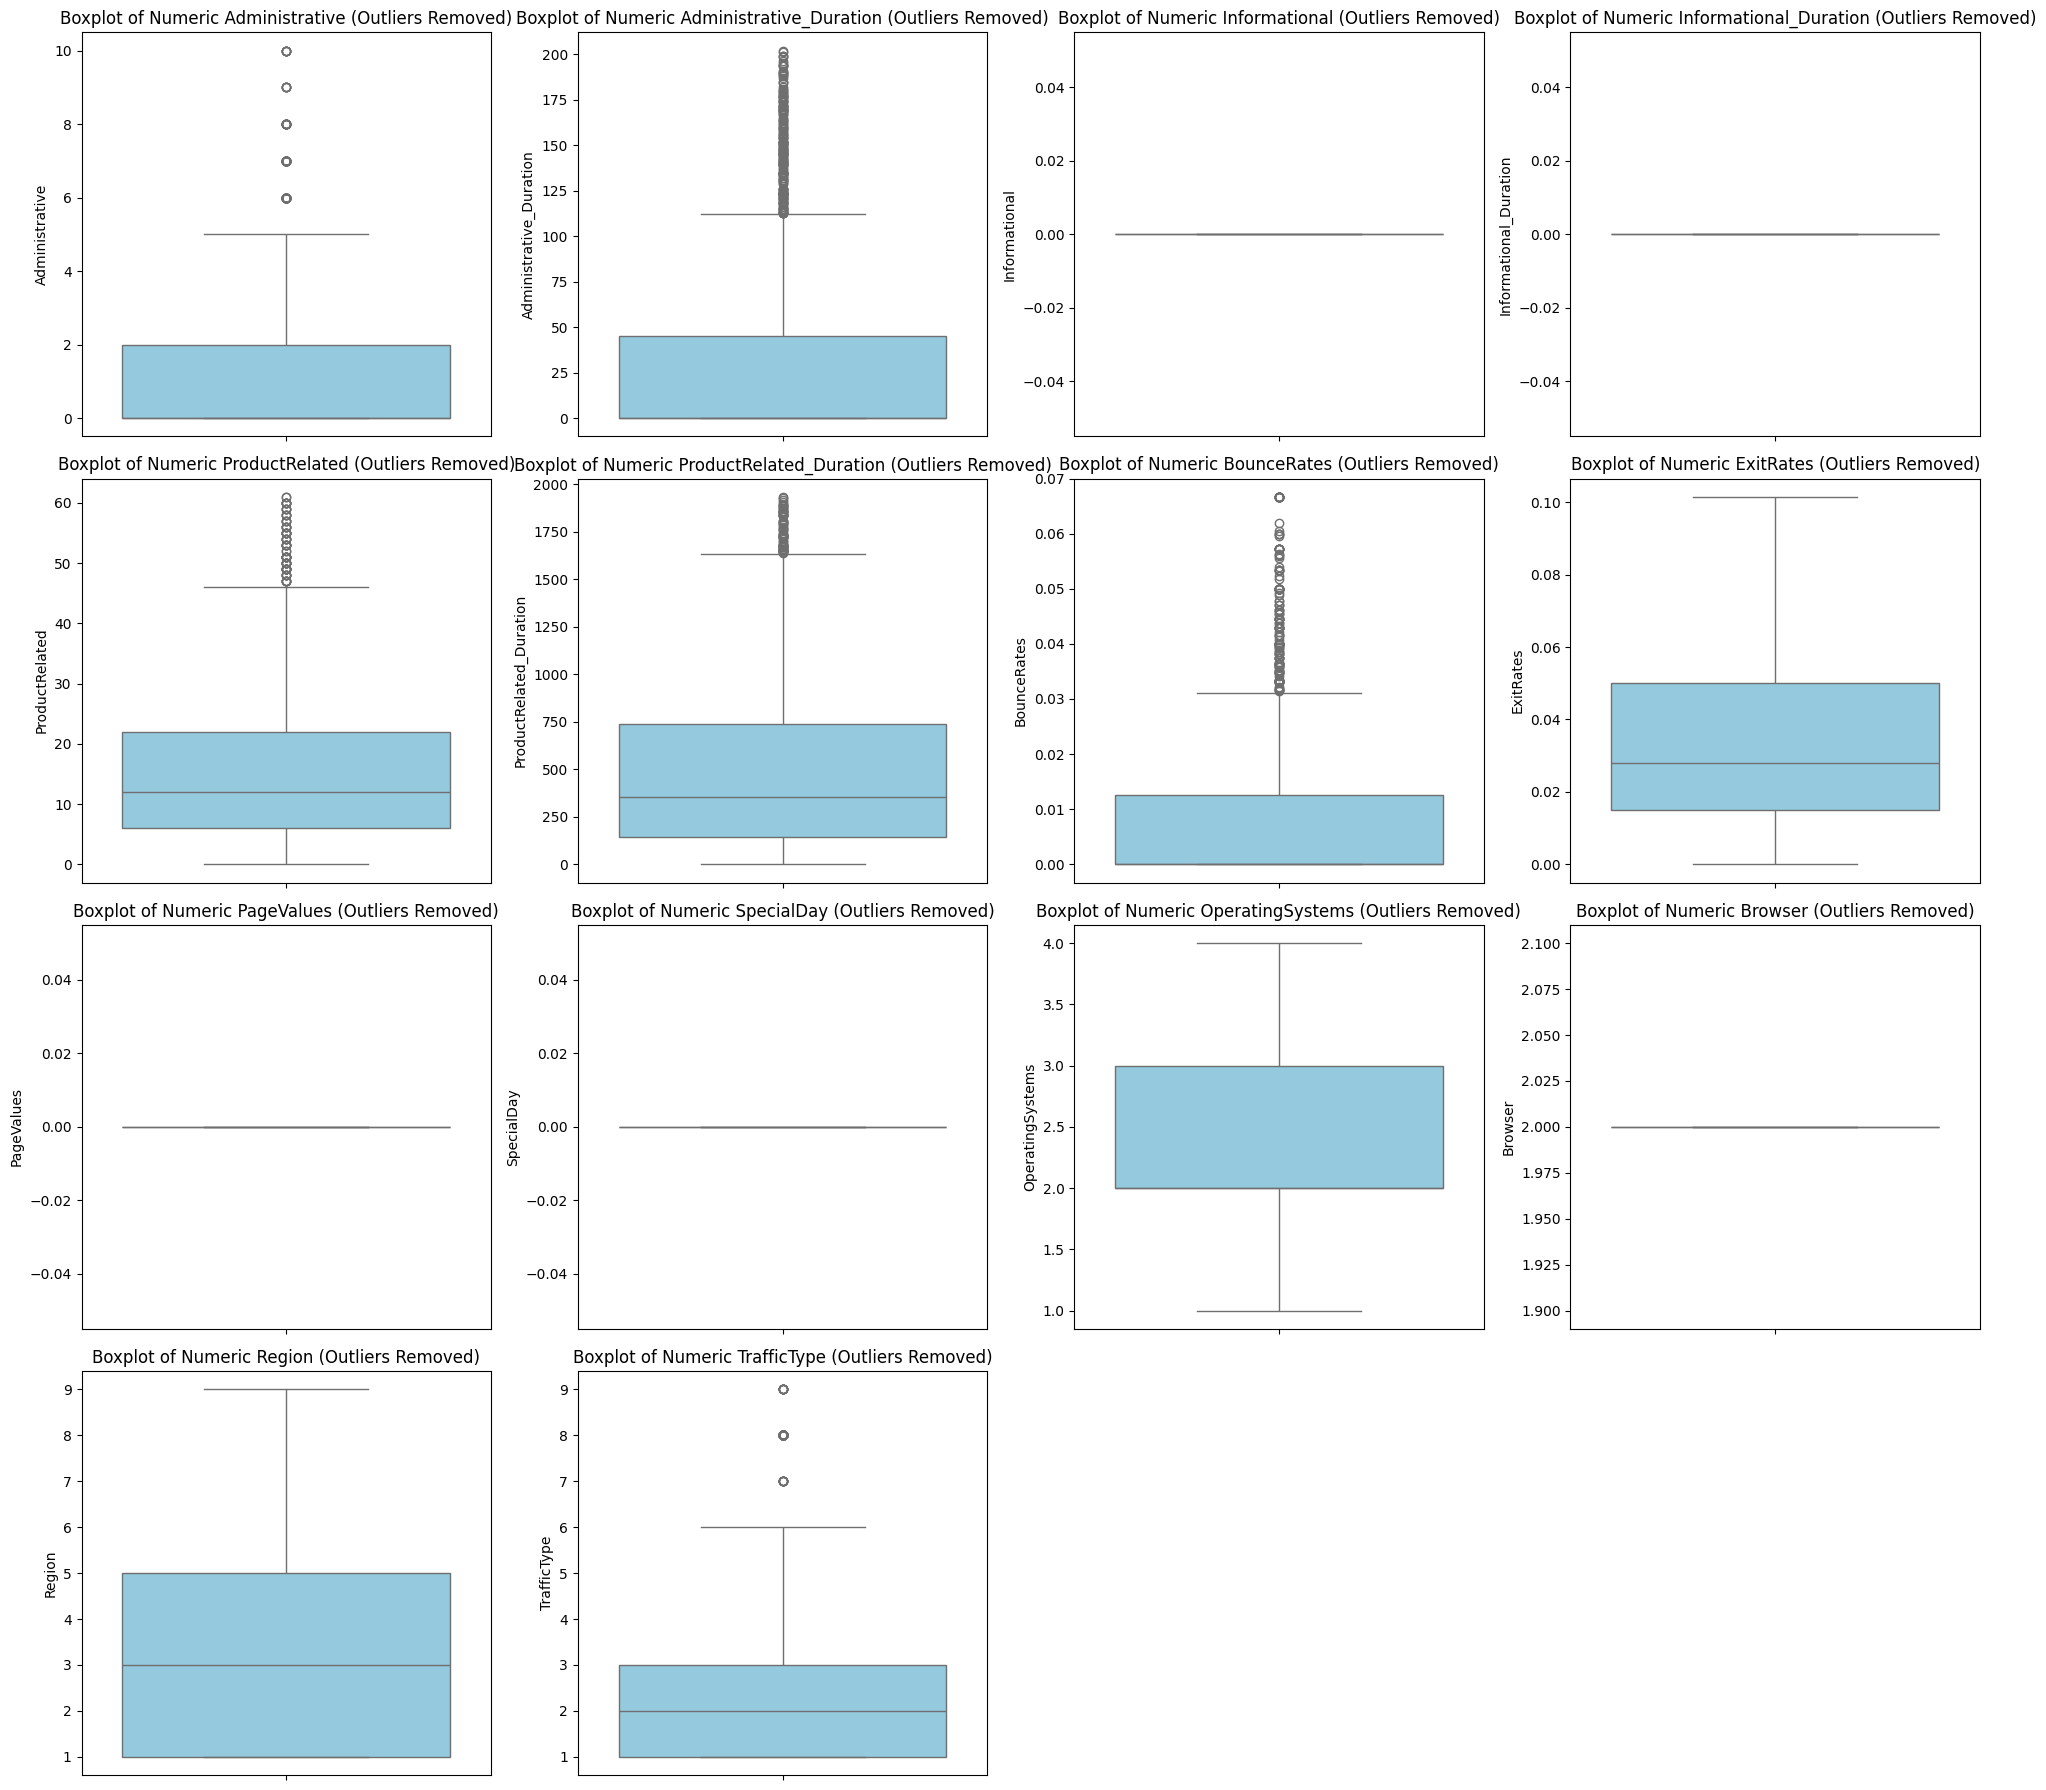

In [ ]:
# Boxplots after outlier removal
plt.figure(figsize=(20, 18))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df_clean[col], color='skyblue')
    plt.title(f'Boxplot of Numeric {col} (Outliers Removed)')

plt.tight_layout()
plt.show()





Categorical Columns: ['Month', 'VisitorType']


<ipython-input-75-58d6ff7dc3df>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


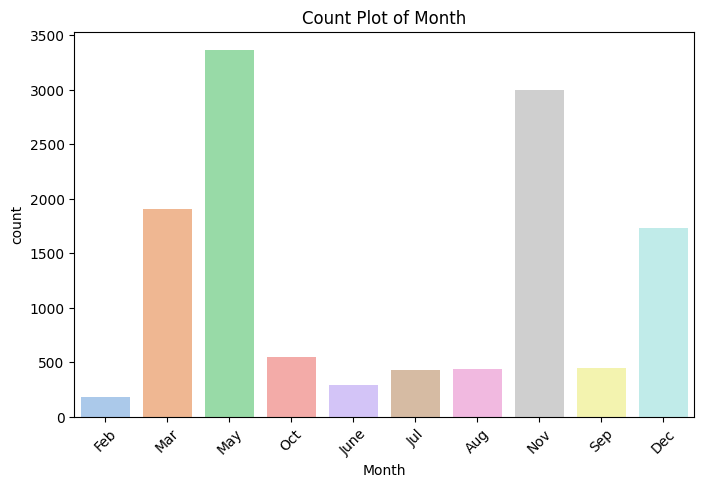

<ipython-input-75-58d6ff7dc3df>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


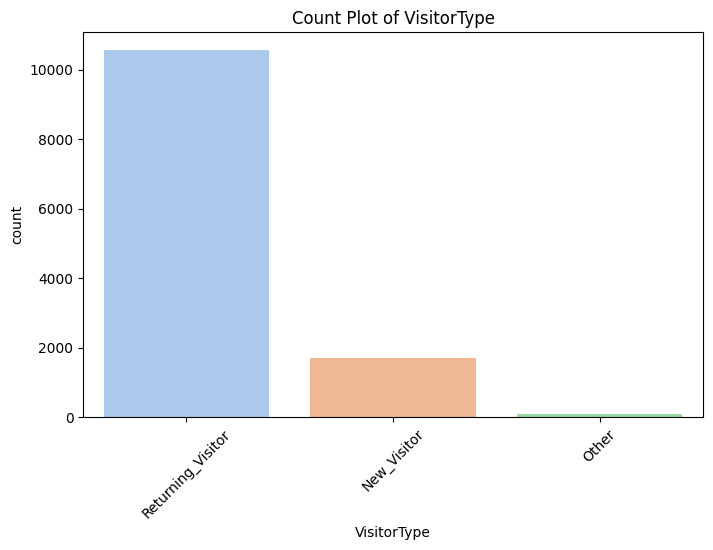

In [ ]:
df = pd.read_csv('online_shoppers_intention.csv')


categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", categorical_cols)

# Countplot for Each Categorical Column
for col in categorical_cols:
    plt.figure(figsize=(8,5))
    sns.countplot(x=col, data=df, palette='pastel')
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()

# **Visualization**

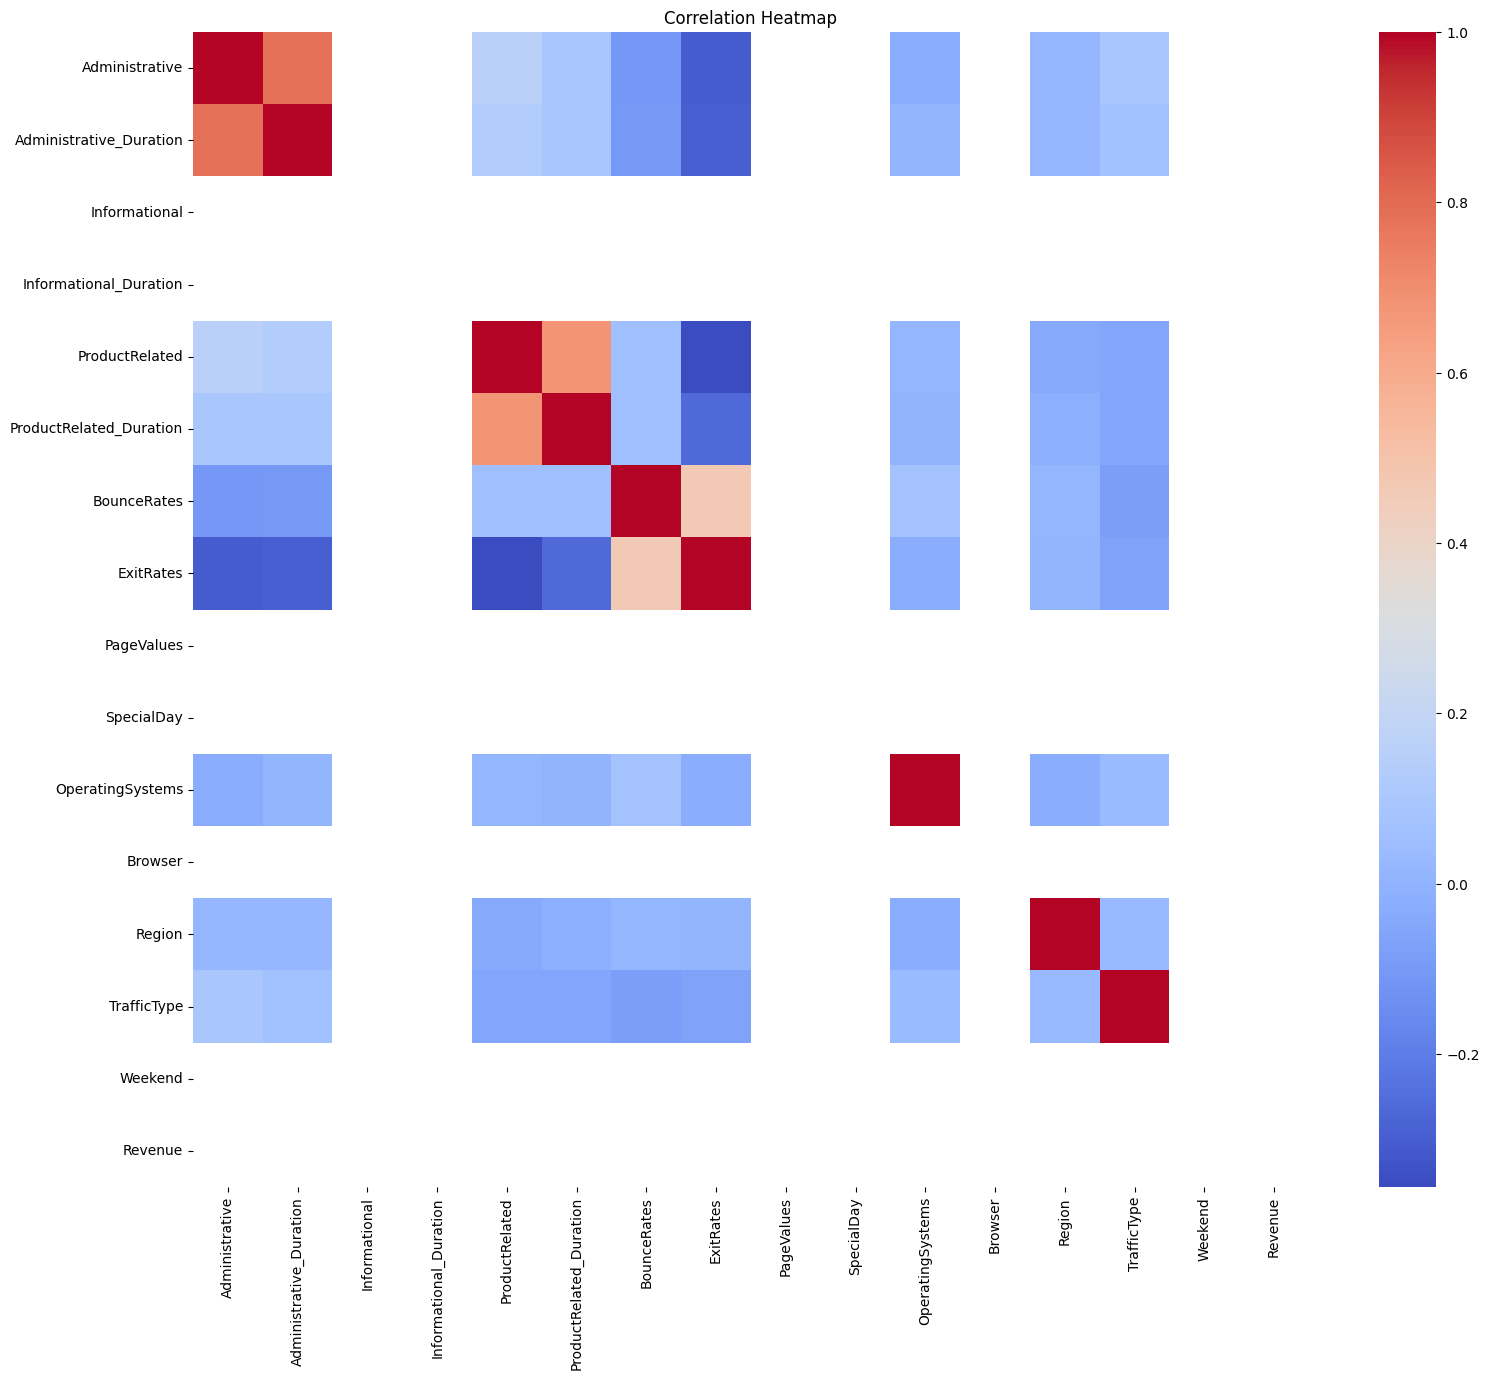

In [ ]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Plot Correlation heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(numeric_data.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()




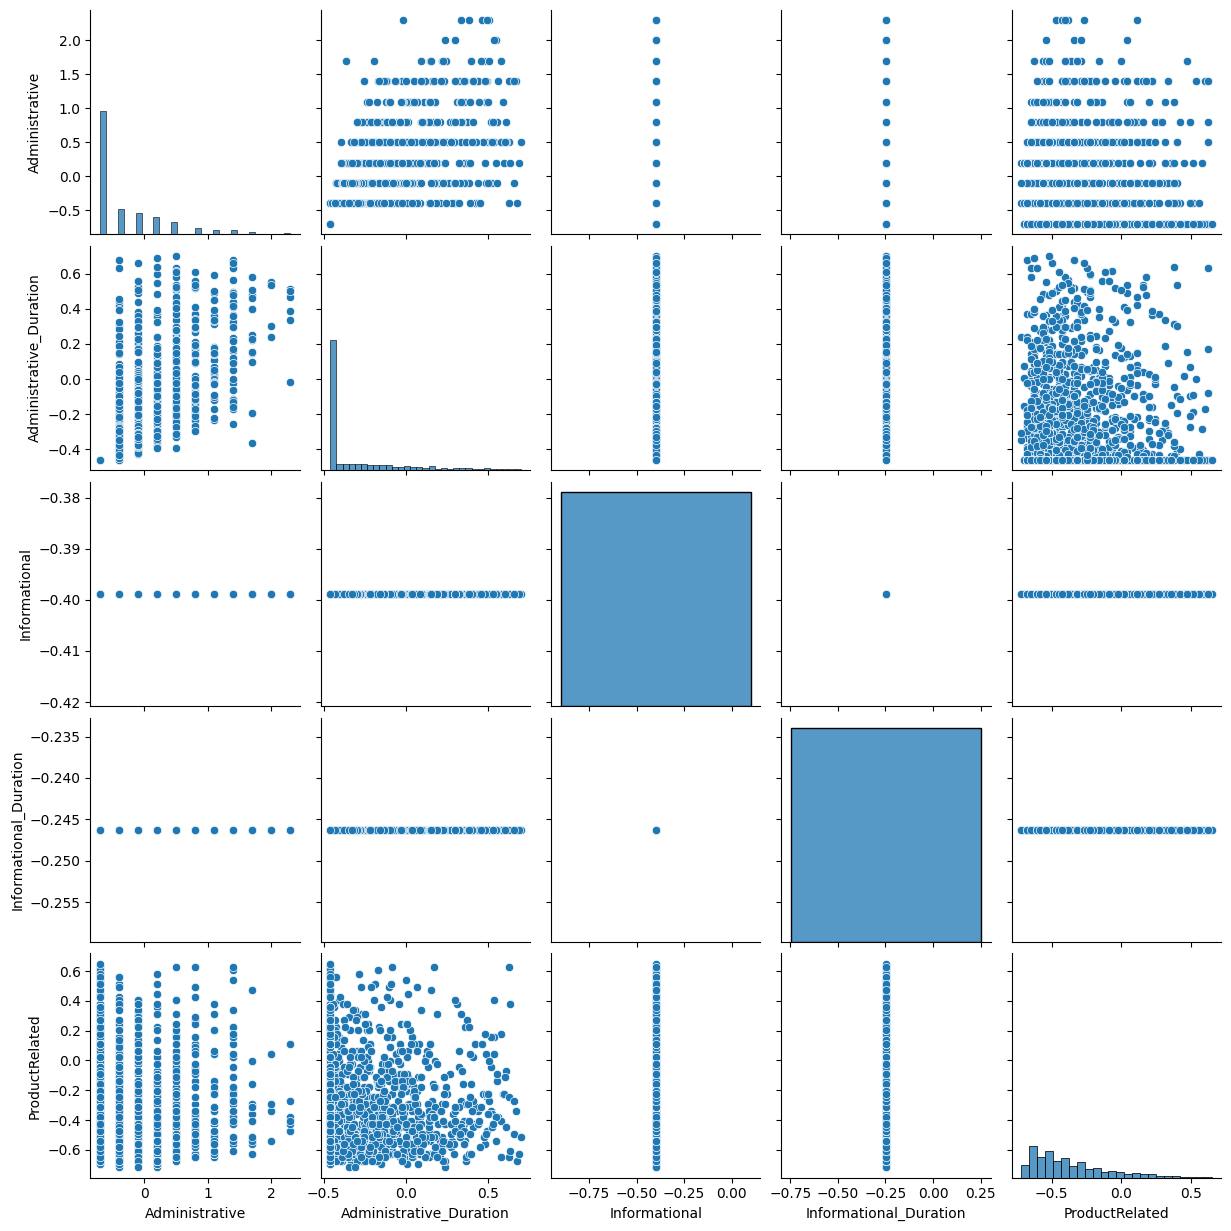

In [ ]:
# Pairplot (first few features for simplicity)
sample_cols = numeric_cols[:5]
sns.pairplot(data[sample_cols])
plt.show()





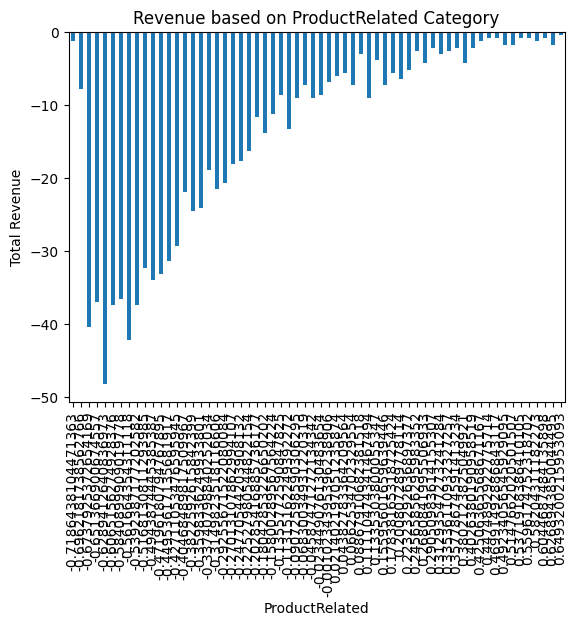

In [ ]:
category_qty = data.groupby('ProductRelated')['Revenue'].sum()
category_qty.plot(kind='bar')
plt.title('Revenue based on ProductRelated Category')
plt.ylabel('Total Revenue')
plt.show()



